***
***

# Assignment 1 - Introduction to PyG

This assignment tests basic control over the PyG and NetworkX module which are commonly used to implement Geometric Deep Learning.

## Some Setup

In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


2.3.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 63.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt


def visualize_graph(G):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                     cmap="Set3")
    plt.show()

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams.update({'font.size': 16})

***

## Section 1 - Graph Creation

## Section 1.1
Creating the following graph in PyG. The numbers inside the squares are both the ID and the values stored in the notes. This is a directed graph, with only 1 edge being undirected.


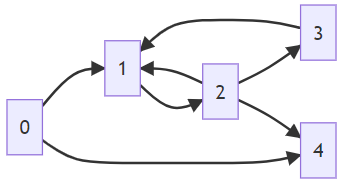

In [4]:
import torch
from torch_geometric.data import Data

##################################################
edge_index = torch.tensor([
    [0,1], #edge from 0 to 1
    [0,4], # from 0 to 4
    [1,2], # from 1 to 2
    [2,1], # from 2 to 1
    [2,3], # from 2 to 3
    [2,4], # from 2 to 4
    [3,1]  # from 3 to 1
], dtype=torch.long)

x = torch.tensor([[0], [1], [2], [3], [4]], dtype=torch.float)


data = Data(x=x, edge_index=edge_index.t().contiguous())
##################################################

### Section 1.2
Code to visualise the graph using the utilities module of PyG  

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


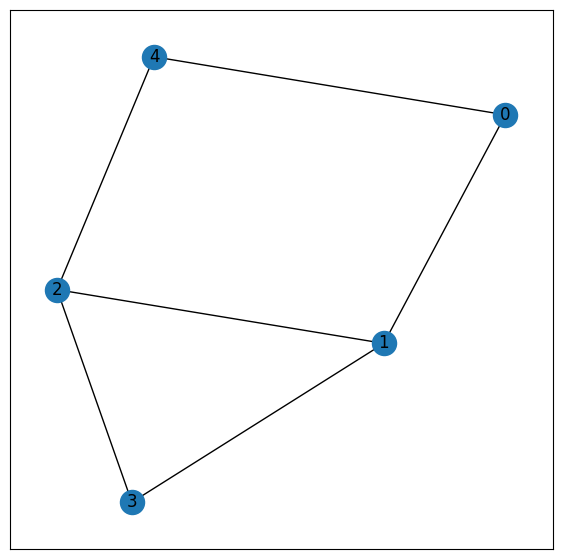

In [5]:
from torch_geometric.utils import to_networkx

###############################################
data = Data(x=x, edge_index=edge_index.t().contiguous())
G = nx.Graph()
G.add_nodes_from(range(data.num_nodes))  #add nodes to graph acc to number of nodes in data

G.add_edges_from(data.edge_index.t().tolist())   # add edges to graph acc to number of edges in data
###############################################
visualize_graph(G)

### Section 1.3

It seems like I made a mistake when creating the graph above. Now I modify the same graph to add these features in it.

*   A node with id 5
*   An edge starting from 1 going to 5
*   An edge starting from 5 going to 0
*   A two-way edge between 2 and 5

In [6]:
############################
G.add_node(5) #add a node with ID 5
G.add_edge(1, 5) #egde from 1 to 5
G.add_edge(5, 0) #edge from 5 to 0
G.add_edge(2, 5) #bw 2 and 5 there is two way edge
G.add_edge(5, 2)
############################

Visualizing the new graph

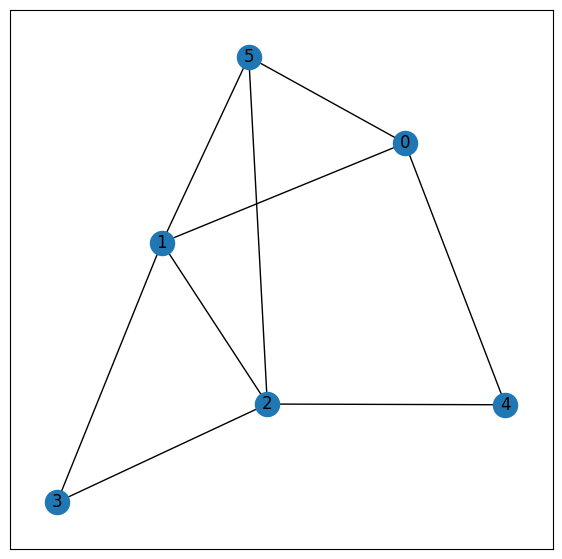

In [7]:
visualize_graph(G)

***

## Section 2 - Graph Properties and Manipulation


In [8]:
from torch_geometric.datasets import TUDataset

mutag_datasets = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')
mutag = mutag_datasets[0]

Processing...
Done!


### Section 2.1
Function to return a tuple containing the following properties of this graph - number of nodes (int), edges (int), node features (int), and directedness (bool), as a tuple -

`(#nodes, #edges, #features, directedness)`

In [9]:
def get_basic_chars(dataset):
   #to get number of nodes, edges and festures
  nodes  = dataset.num_nodes
  edges = dataset.num_edges
  features = dataset.num_node_features

   #to create a networkx graph
  edge_index = dataset.edge_index.T
  g = nx.Graph()
  g.add_nodes_from(range(nodes))
  g.add_edges_from(edge_index.tolist())

  drtds = nx.is_directed(g) #check if graph is directed
  ################################################
  chars = (nodes,edges,features,drtds)
  return chars

get_basic_chars(mutag)

(42, 162, 3, False)

### Section 2.2
Does this graph have any self loops? What about isolated nodes?

In [10]:
def addn_props(dataset):
  #############################################
  # Your Code Here
  self_obsessed = dataset.has_self_loops() #to check for self loops in dataset

    #to create a networkx graph
  edge_index = dataset.edge_index.T
  g = nx.Graph()
  g.add_nodes_from(range(dataset.num_nodes))
  g.add_edges_from(edge_index.tolist())

  loners = [node for node in g.nodes if g.degree[node]==0] #to find isolated nodes
  #############################################
  return (self_obsessed, loners)

addn_props = addn_props(mutag)
print(f'Does this graph have self loops? {addn_props[0]}')
print(f'Does this graph have isolated nodes? {addn_props[1]}')

Does this graph have self loops? False
Does this graph have isolated nodes? []


Let's convert this PyG object to a NetworkX object for some more advanced calculations.

In [11]:
from torch_geometric.utils import to_networkx

G = to_networkx(mutag,to_undirected=True)

### Section 2.3
Computing the average degree of this network, rounded to the nearest integer.

In [12]:
def avg_degree(G):

  degrees = [degree for node, degree in G.degree()]  #to calculate degree of each node

  avg_deg = round(sum(degrees) / len(degrees))   #to take avg then round it off

  return avg_deg

avg_deg = avg_degree(G)
print(f'Average degree of MUTAG is {avg_deg}')

Average degree of MUTAG is 4


### Section 2.4
Randomly splitting this dataset into train-val-test sets in the ratio 75-15-10, ie. 75% training, 15% validation, 10% testing.



In [13]:

from sklearn.model_selection import train_test_split
train, rem = train_test_split(G, train_size=0.75, random_state=42)
val, test = train_test_split(rem, train_size=0.6, random_state=42)
########################################

### Section 2.4

Reference on small-world networks - [Small-world network](https://www.wikiwand.com/en/Small-world_network)

1. Calculating the sigma and omega coefficients for small-worldness by directly calling the inbuilt library functions of networkx
2. Calculating the sigma and omega coefficients for small-worldness by finding the values of c, c_r, l, l_r, c_l etc.
3. Timing both the methods and compare the time taken. Is it taking too long? Try calculating the average clustering coefficient yourself from the dictionary obtained by clustering, does that help? Why?



In [14]:
import timeit


sigma = nx.sigma(G)
omega = nx.omega(G)
direct_time = timeit.timeit(lambda: (sigma, omega), number=100)
######################################################


def calc_sig_omg(G):
  ####################################################
  #  Manual Method
  c = nx.average_clustering(G)
  l = nx.average_shortest_path_length(G)
  c_R = nx.average_clustering(nx.erdos_renyi_graph(G.number_of_nodes(), G.number_of_edges()))
  l_R = nx.average_shortest_path_length(nx.erdos_renyi_graph(G.number_of_nodes(), G.number_of_edges()))
  R = c/c_R
  L = l/l_R
  c_L = R/L
  l_L = L/R
  sig = (c/c_R) / (l/l_R)
  omg = (l_R/l) - (c/c_L)
  man_time = timeit.timeit(lambda: (c, l, c_R, l_R, R, L, c_L, l_L, sig, omg), number=100)
  ####################################################
  return (sig,omg,man_time)


sig, omg, man_time = calc_sig_omg(G)


print(f'Direct Sigma Coefficient: {sigma}')
print(f'Direct Omega Coefficient: {omega}')
print(f'Time for Direct Method: {direct_time}')
print(f'Conv Sigma Coefficient: {sig}')
print(f'Conv Omega Coefficient: {omg}')
print(f'Time for Conv Method: {man_time}')


Direct Sigma Coefficient: 2.421375478097713
Direct Omega Coefficient: -0.4731760121238363
Time for Direct Method: 2.3016999989522446e-05
Conv Sigma Coefficient: 0.06368802771162589
Conv Omega Coefficient: -5.178288234804533
Time for Conv Method: 2.888200003781094e-05


***

## Section 3 - The Clustering Coefficient




We have already seen the global clustering coefficient in action in the lecture slides. Let's now however talk about the local clustering coefficient. The local clustering coefficient for a vertex is the proportion of links between the vertices of its neighbourhood divided by the number of links that could possibly exist between them.

We define a **wedge** as an ordered triplet of edges, which share exactly one common node, called the centre of the wedge.
We call a wedge complete if the edge between the two ends of the wedge exist, completing the triangle.

We denote the degree of vertex $i$ by $k_i$.

Now we can probably define the clustering coefficient in terms of $k_i$ and the adjacency matrix of the graph $A$.


#### Deriving an expression for the local clustering coefficient $C_i$ of a vertex $i$ for an undirected graph in terms of the adjacency matrix $A$ and $k_i$.


Local clustering coefficient  𝐶𝑖  of a vertex  𝑖  for an undirected graph in terms of the adjacency matrix  𝐴  and  𝑘𝑖 can be defined by the formula-

𝐶𝑖 = 2(𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑒𝑑𝑔𝑒𝑠 𝑏𝑒𝑡𝑤𝑒𝑒𝑛 𝑣𝑒𝑟𝑡𝑖𝑐𝑒𝑠 𝑛𝑒𝑎𝑟 𝑣𝑒𝑟𝑡𝑒𝑥 𝑖) / 𝑘𝑖(𝑘𝑖 - 1)


where- 𝐶𝑖 is the local clustering coefficient of vertex 𝑖,
 𝑘𝑖 is the degree of vertex 𝑖 and
 (𝑘𝑖(𝑘𝑖 - 1) / 2) is maximum possible edges that can exist between the neighbors of vertex 𝑖

 the fraction obtained represents the possible nterconnections between the neighbours.

 if ranges from 0 to 1. If it is 0 we get a star with edges going out with none of them connected to each other
 If we get1, it is called clique with all the neighbours connected to each other.

The global clustering coefficient based on this concept of a wedge would simply be the fraction of closed wedges in the entire network.
#### Deriving the expression to calculate the global clustering coefficient $C$ of the entire network.

> (Assuming naturally, that the network only has finitely many nodes)


Global clustering coefficient is the average of the local clustering coefficients of all vertices in the network.

formula- 𝐶 = (1 / 𝑁) * ∑(𝐶𝑖)

where 𝐶 is the global clustering coefficient of the entire network, 𝑁 is the total number of vertices in the network and 𝐶𝑖 is the local clustering coefficient of vertex 𝑖.

Finally let's turn this concept on its head. Instead of measuring the local clustering coefficient in terms of closed wedges on a centre, we'll measure about the head (or end) of the wedge.

Define the **back-in-2 coefficient, $Bi_2(i)$** as the fraction of wedges, *headed* at $i$ that are closed.
#### Expression for the $Bi_2$ coefficient of a vertex $i$ in terms of adjacency matrices only

𝐵𝑖2  coefficient of a vertex 𝑖 in terms of adjacency matrices can be expressed as-
𝐵𝑖2 = 𝐴^2 ⋅ 𝐴 - 𝑘𝑖

where- A is the adjacency matrix, and 𝑘𝑖 is the degree of vertex 𝑖

> ### Fun Ques: Common standard name for the Bi_2 coefficient?

common name can be 'local clustering coefficient'. this is because bi2 represents the same thing but in triangle form- 'the likelihood of forming a triangle in a network. It is defined as the ratio of the number of closed triangles (wedges with a complete triangle) involving a node to the total number of wedges centered at that node.'

***
***